<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
# First look 
comment.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
#!pip install textblob
from textblob import TextBlob

In [6]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [7]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
# dropping null value
comment.dropna(inplace=True)

In [9]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
# Creating new polarity column
comment['polarity']=polarity

In [11]:
# First look
comment.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [12]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [13]:
comment_positive.shape

(20400, 5)

In [14]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [15]:
# Unique Value
stopwords=set(STOPWORDS)

In [16]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [17]:
# This data Is Too big in the github so comment it 
#total_comment

In [18]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

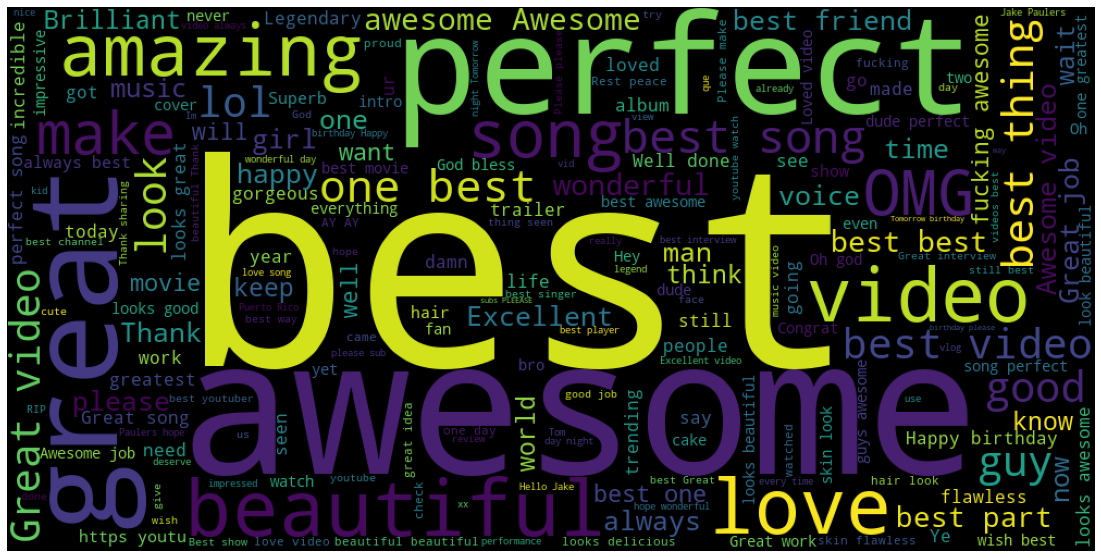

In [19]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [20]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [21]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [22]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

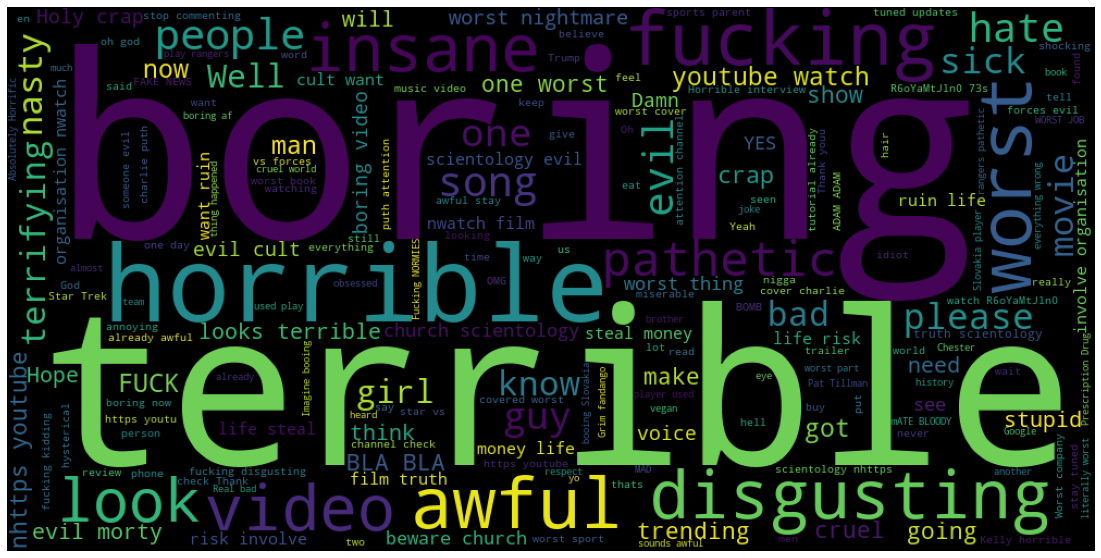

In [23]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

## **Q1...  Analysing Tag Column , What Are The Trending Tags On YouTube ??**

In [24]:
## Path Of The Data
videos = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [25]:
# First Look
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [26]:
# first look to the tags column only
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [27]:
# Joining The all Tags in the form of string
tags_string = ' '.join(videos['tags'])

In [28]:
# First look After Joining Tags
#tags_string

####**Conclusion**
The Given Tags Column contain some Noise or Special Charaters Which must be cleaned of before futher analysis.

In [29]:
# Importing The Regular Experession
import re

In [30]:
# substituting  the sapace in case of special charater or Noise
tags = re.sub('[^a-zA-Z]'," ",tags_string)

In [31]:
# first look
#tags

In [32]:
# Removing The Extra Space From The String
tags = re.sub(' +',' ',tags)

In [33]:
# First Look
#tags

In [34]:
# From the Word Cloud unique words in the tags 
wordcloud = WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

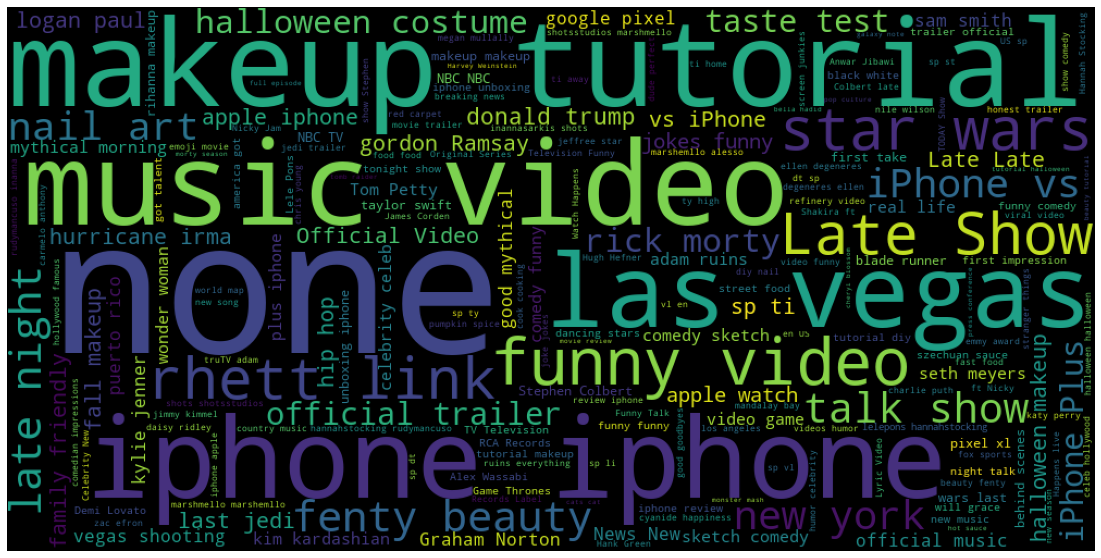

In [35]:
# Plotting the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

###**Q.2...Perform Analysis On Likes, Videos & Dislikes and Find How They Are Correlated To Each Other ???**

Text(0.5, 1.0, 'Regression Plot B/W Like & Views')

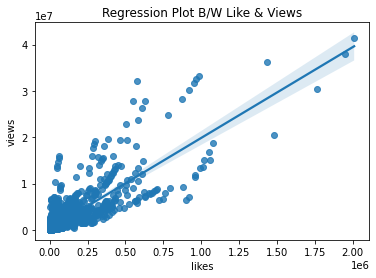

In [36]:
# Regression Plot
sns.regplot(data=videos,x='likes',y='views')
plt.title("Regression Plot B/W Like & Views")


Text(0.5, 1.0, 'Regression Plot B/W DisLike & Views')

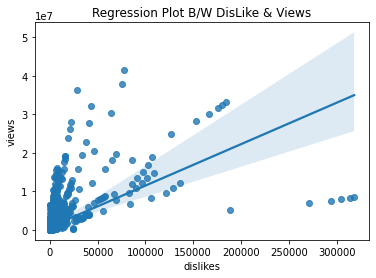

In [37]:
# Regression Plot
sns.regplot(data=videos,x='dislikes',y='views')
plt.title("Regression Plot B/W DisLike & Views")

In [38]:
df_corr = videos[['views','likes','dislikes']]

In [39]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

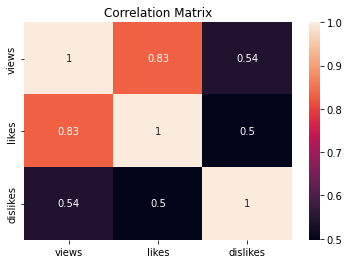

In [40]:
# Heat Map
sns.heatmap(df_corr.corr(),annot=True)
plt.title("Correlation Matrix")

###**Q....-> Analysis Of Emoji's In Comments...???**

In [41]:
# First look
comment.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [42]:
# Need to Extract Emojis Form the comment_tag
comment['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [44]:
pip install emoji==0.6.0

     |████████████████████████████████| 51 kB 3.2 MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49735 sha256=8603afa7d2a07255598f285de685eb5e8d3d8c2110e7e43a55df3a92fe3f3553
  Stored in directory: /root/.cache/pip/wheels/4e/bf/6b/2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji


In [45]:
# Importing Libarary
import emoji

In [46]:
comments = comment['comment_text'][1]

In [47]:
[c for c in comments if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [48]:
str=""
for i in comment['comment_text']:
  list=[c for c in i if c in emoji.UNICODE_EMOJI]
  for ele in list:
    str=str+ele  

In [49]:
len(str)

341868

In [50]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

In [52]:
result={}
for i in set(str):
  result[i]=str.count(i)

In [53]:
result

{'🧜': 5,
 '💡': 63,
 '📐': 25,
 '🔆': 44,
 '🐀': 45,
 '😨': 390,
 '🚗': 27,
 '🤝': 32,
 '🛌': 13,
 '🔜': 23,
 '🇦': 963,
 '💳': 41,
 '👥': 13,
 '💣': 234,
 '◻': 5,
 '🤼': 24,
 '♑': 9,
 '🏾': 1241,
 '🌤': 10,
 '🎺': 52,
 '🍦': 48,
 '🏈': 45,
 '🚳': 10,
 '🚱': 7,
 '🕥': 8,
 '☣': 19,
 '🍖': 43,
 '😟': 147,
 '👄': 125,
 '🛳': 10,
 '💓': 1579,
 '🏕': 7,
 '😠': 473,
 '😌': 466,
 '✋': 149,
 '🕷': 99,
 '💿': 929,
 '🆗': 12,
 '👵': 26,
 '🕍': 6,
 '🕡': 7,
 '🎐': 5,
 '🐪': 13,
 '🏬': 7,
 '🐤': 154,
 '♿': 12,
 '🖋': 7,
 '🚛': 5,
 '👏': 5357,
 '📉': 36,
 '🈯': 5,
 '🌏': 32,
 '🐥': 117,
 '🌚': 59,
 '🚑': 10,
 '㊗': 6,
 '📝': 16,
 '📂': 28,
 '↙': 9,
 '🇽': 163,
 '💝': 562,
 '🤒': 43,
 '☄': 23,
 '🏳': 92,
 '⚔': 10,
 '🔅': 39,
 '⏯': 4,
 '🔀': 6,
 '🇾': 33,
 '💔': 652,
 '🤹': 1,
 '🖕': 1019,
 '🉐': 9,
 '🐟': 67,
 '🔍': 11,
 '🍊': 26,
 '🐔': 43,
 '🏧': 6,
 '😄': 1541,
 '🤠': 27,
 '🐁': 31,
 '👿': 90,
 '👐': 127,
 '🍜': 26,
 '📣': 32,
 '🏯': 7,
 '🏀': 37,
 '💛': 2169,
 '💅': 166,
 '♏': 14,
 '😀': 1788,
 '🎎': 8,
 '🚪': 16,
 '💽': 19,
 '➡': 44,
 '◽': 5,
 '🤑': 157,
 '💺': 9,
 '🐈': 62,
 '🚷

In [54]:
result.items()

dict_items([('🧜', 5), ('💡', 63), ('📐', 25), ('🔆', 44), ('🐀', 45), ('😨', 390), ('🚗', 27), ('🤝', 32), ('🛌', 13), ('🔜', 23), ('🇦', 963), ('💳', 41), ('👥', 13), ('💣', 234), ('◻', 5), ('🤼', 24), ('♑', 9), ('🏾', 1241), ('🌤', 10), ('🎺', 52), ('🍦', 48), ('🏈', 45), ('🚳', 10), ('🚱', 7), ('🕥', 8), ('☣', 19), ('🍖', 43), ('😟', 147), ('👄', 125), ('🛳', 10), ('💓', 1579), ('🏕', 7), ('😠', 473), ('😌', 466), ('✋', 149), ('🕷', 99), ('💿', 929), ('🆗', 12), ('👵', 26), ('🕍', 6), ('🕡', 7), ('🎐', 5), ('🐪', 13), ('🏬', 7), ('🐤', 154), ('♿', 12), ('🖋', 7), ('🚛', 5), ('👏', 5357), ('📉', 36), ('🈯', 5), ('🌏', 32), ('🐥', 117), ('🌚', 59), ('🚑', 10), ('㊗', 6), ('📝', 16), ('📂', 28), ('↙', 9), ('🇽', 163), ('💝', 562), ('🤒', 43), ('☄', 23), ('🏳', 92), ('⚔', 10), ('🔅', 39), ('⏯', 4), ('🔀', 6), ('🇾', 33), ('💔', 652), ('🤹', 1), ('🖕', 1019), ('🉐', 9), ('🐟', 67), ('🔍', 11), ('🍊', 26), ('🐔', 43), ('🏧', 6), ('😄', 1541), ('🤠', 27), ('🐁', 31), ('👿', 90), ('👐', 127), ('🍜', 26), ('📣', 32), ('🏯', 7), ('🏀', 37), ('💛', 2169), ('💅', 166), ('

In [56]:
final = {}
for key,value in sorted(result.items(),key = lambda item:item[1]):
  final[key]=value

In [57]:
final

{'🤹': 1,
 '🦏': 1,
 '🧤': 1,
 '🥡': 1,
 '🥟': 1,
 '🥜': 1,
 '🤾': 1,
 '🤺': 1,
 '🤟': 1,
 '🧣': 1,
 '🥨': 1,
 '🛷': 1,
 '🤽': 1,
 '🦓': 1,
 '🧠': 1,
 '🥌': 1,
 '🛒': 1,
 '🥚': 1,
 '🎌': 2,
 '🧘': 2,
 '🦖': 2,
 '🧛': 2,
 '🧡': 2,
 '🧒': 2,
 '🦔': 2,
 '🧝': 2,
 '🥅': 2,
 '🧢': 2,
 '🦕': 2,
 '🤱': 2,
 '🤫': 3,
 '🧐': 3,
 '🤯': 3,
 '🥖': 3,
 '🤨': 3,
 '🥄': 3,
 '⏯': 4,
 '🖍': 4,
 '🦍': 4,
 '♾': 4,
 '🤵': 4,
 '🏷': 4,
 '🥝': 4,
 '🛢': 4,
 '⏏': 4,
 '🦐': 4,
 '🗓': 4,
 '🖇': 4,
 '🤬': 4,
 '⚗': 4,
 '🗂': 4,
 '♟': 4,
 '⏹': 4,
 '☸': 4,
 '🛣': 4,
 '⚙': 4,
 '🥈': 4,
 '🦆': 4,
 '🏌': 4,
 '🥞': 4,
 '⏸': 4,
 '🧟': 4,
 '💹': 4,
 '🛬': 4,
 '☦': 4,
 '🗄': 4,
 '⏲': 4,
 '🧜': 5,
 '◻': 5,
 '🎐': 5,
 '🚛': 5,
 '🈯': 5,
 '◽': 5,
 'ℹ': 5,
 '🔲': 5,
 '✡': 5,
 '🈲': 5,
 '🦒': 5,
 '㊙': 5,
 '↖': 5,
 '🔣': 5,
 '⛱': 5,
 '🔚': 5,
 '🔄': 5,
 '🕎': 5,
 '🕹': 5,
 '🗳': 5,
 'Ⓜ': 5,
 '⚒': 5,
 '🈹': 5,
 '⏺': 5,
 '🗞': 5,
 '🚉': 5,
 '↕': 5,
 '🤮': 5,
 '🖼': 5,
 '🧖': 5,
 '♠': 5,
 '🥛': 5,
 '🈴': 5,
 '🚟': 5,
 '↩': 5,
 '🔤': 5,
 '🚎': 5,
 '⛸': 5,
 '🔼': 5,
 '🈵': 5,
 '❎': 5,
 '🥉': 5,
 '🔡': 5,
 '⛏': 5,
 